In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [5]:
df = pd.read_csv(url, sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
#print first 5 and last 7 records
df.head(5)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [8]:
df.tail(7)

,order_id,quantity,item_name,choice_description,item_price
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [9]:
# print total records and type of variables
print(df.shape)
df.info()

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [10]:
#Print the name of all the columns.
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [11]:
#How is the dataset indexed?
df.index

RangeIndex(start=0, stop=4622, step=1)

In [151]:
# Which was the most ordered item? and How many items were ordered?
gropuby_item = df.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
print('\033[92m  \033[1m most ordered item is {} and {} times its ordered'.format(gropuby_item.index[0], gropuby_item.quantity[0]))  
gropuby_item.head(1)

   most ordered item is Chicken Bowl and 761 times its ordered


,order_id,quantity,item_price
item_name,,,
Chicken Bowl,713926,761,7342.73


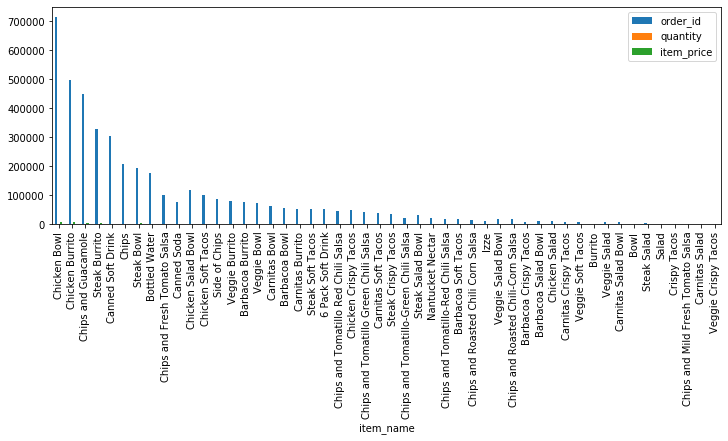

In [152]:
%matplotlib inline
gropuby_item.plot(kind='bar', figsize = (12, 4))

In [153]:
#What was the most ordered item in the choice_description column?
groupby_choice = df.groupby('choice_description').sum().sort_values('quantity', ascending=False)
print('\033[92m  \033[1m most ordered item in choice_description is {} and {} times its ordered'.format(groupby_choice.index[0], groupby_choice.quantity[0]))  
groupby_choice.head(1)

   most ordered item in choice_description is [Diet Coke] and 159 times its ordered


,order_id,quantity,item_price
choice_description,,,
[Diet Coke],123455,159,326.71


In [79]:
#Turn the item price into a float

df['item_price'].str.replace('$','').astype('float')

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [84]:
dollor = lambda x: float(x[1:-1])
df.item_price = df.item_price.apply(dollor)
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [90]:
#How much was the revenue for the period in the dataset?
df.revenue = df.quantity*df.item_price
print('revenue was $' + str(np.round(df.revenue.sum(),2)))

revenue was $39237.02


In [92]:
#print a data frame with only two columns item_name and item_price
df[['item_name','item_price']].head()

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98


In [95]:
# delete the duplicates in item_name and quantity 
filtered = df.drop_duplicates(['item_name','quantity'], keep='first')

In [103]:
# select only the products with quantity equals to 1
one_prod = filtered[filtered.quantity == 1]
one_prod.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98


In [155]:
# select only the item_name and item_price columns
one_prod[['item_name','item_price']].sort_values('item_price', ascending=False)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


In [132]:
# sort the values from the most to less expensive
sort_price = df.sort_values('item_price', ascending=False)
sort_price.head()


,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75


In [135]:
#What was the quantity of the most expensive item ordered?
print('\033[92m  \033[1m most expensive item is {} ordered {} times and the price is {}'.format(sort_price.item_name[0], sort_price.quantity.max(), sort_price.item_price.max()))
df.sort_values('item_price', ascending=False).head(1)

   most expensive item is Chips and Fresh Tomato Salsa ordered 15 times and the price is 44.25


,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


In [136]:
df.groupby('item_name')['item_price','quantity'].max().sort_values('item_price', ascending=False).head(1)

C:\Users\Harish\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,item_price,quantity
item_name,,
Chips and Fresh Tomato Salsa,44.25,15


In [ ]:
#How many times were a Veggie Salad Bowl ordered?

In [146]:
print('{} times Veggie Salad Bowl ordered'.format(no_of_times_veggie_ordered))
no_of_times_veggie_ordered = df[df.item_name == 'Veggie Salad Bowl'].sum()['quantity']


18 times Veggie Salad Bowl ordered


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
#Which continent drinks more beer on average?

In [3]:
df.groupby('continent').mean()['beer_servings']

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [ ]:
#For each continent print the statistics for wine consumption.

In [4]:
df.groupby('continent').describe()['wine_servings']

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [61]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [33]:
#Convert the type of the column Year to datetime64
crime['Year'] = pd.to_datetime(crime['Year'], format = '%Y')

In [35]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                5 non-null      datetime64[ns]
 1   Population          55 non-null     int64         
 2   Total               55 non-null     int64         
 3   Violent             55 non-null     int64         
 4   Property            55 non-null     int64         
 5   Murder              55 non-null     int64         
 6   Forcible_Rape       55 non-null     int64         
 7   Robbery             55 non-null     int64         
 8   Aggravated_assault  55 non-null     int64         
 9   Burglary            55 non-null     int64         
 10  Larceny_Theft       55 non-null     int64         
 11  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


In [46]:
#Set the Year column as the index of the dataframe¶
crime.set_index('Year').head()

In [44]:
#Group the year by decades and sum the values¶
crime.groupby((crime.index.year//10)*10).sum()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,927710175,19298500,1560550,17737900,44380,91030,572230,852910,5155600,10670200,1912100


In [45]:
crime

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [47]:
# Uses resample to sum each decade
crime.resample('10AS').sum()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,927710175,19298500,1560550,17737900,44380,91030,572230,852910,5155600,10670200,1912100


In [48]:
# Uses resample to get the max value only for the "Population" column
crime['Population'] = crime['Population'].resample('10AS').max()

In [49]:
crime

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,191141000.0,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,NaN,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,NaN,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,NaN,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,NaN,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [63]:
#Return the first 3 rows of the DataFrame df.
df = crime

In [51]:
df[:3]

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,191141000.0,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,NaN,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,NaN,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800


In [52]:
#Select just the 'Murder' and 'Robbery' columns from the DataFrame df and print
df[['Murder','Robbery']]

,Murder,Robbery
Year,,
1960-01-01,9110,107840
1961-01-01,8740,106670
1962-01-01,8530,110860
1963-01-01,8640,116470
1964-01-01,9360,130390


In [65]:
#Select the data in rows [3, 4, 8] and in columns ['Murder', 'Robbery']
df.loc[df.index[[3, 4, 8]], ['Murder', 'Robbery']]

,Murder,Robbery
3,8640,116470
4,9360,130390
8,13800,262840


In [72]:
#Select only the rows where the number of murder is greater than 24,000
df[df['Murder'] > 24000]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
31,1991,252177000,14872900,1911770,12961100,24700,106590,687730,1092740,3157200,8142200,1661700
33,1993,257908000,14144800,1926020,12218800,24530,106010,659870,1135610,2834800,7820900,1563100


In [75]:
#Select the rows the murder is between 20k and 24k (inclusive)
df[(df['Murder'] >= 20000) & (df['Murder'] <= 24000)]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
14,1974,211392000,10253400,974720,9278700,20710,55400,442400,456210,3039200,5262500,977100
15,1975,213124000,11292400,1039710,10252700,20510,56090,470500,492620,3265300,5977700,1009600
19,1979,220099000,12249500,1208030,11041500,21460,76390,480700,629480,3327700,6601000,1112800
20,1980,225349264,13408300,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700
21,1981,229146000,13423800,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
22,1982,231534000,12974400,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
26,1986,240132887,13211869,1489169,11722700,20613,91459,542775,834322,3241410,7257153,1224137
27,1987,242282918,13508700,1483999,12024700,20096,91110,517704,855088,3236184,7499900,1288674
28,1988,245807000,13923100,1566220,12356900,20680,92490,542970,910090,3218100,7705900,1432900
29,1989,248239000,14251400,1646040,12605400,21500,94500,578330,951710,3168200,7872400,1564800


In [78]:
#Calculate the mean murder for each different year in df

df.groupby('Year')['Murder'].mean().head()

Year
1960    9110
1961    8740
1962    8530
1963    8640
1964    9360
Name: Murder, dtype: int64

In [80]:
#Sort df first by the values in the 'Murder' in decending order,
#then by the value in the 'Violent' column in ascending order.
df.sort_values(['Murder','Violent'], ascending=[False, True]).head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
31,1991,252177000,14872900,1911770,12961100,24700,106590,687730,1092740,3157200,8142200,1661700
33,1993,257908000,14144800,1926020,12218800,24530,106010,659870,1135610,2834800,7820900,1563100
32,1992,255082000,14438200,1932270,12505900,23760,109060,672480,1126970,2979900,7915200,1610800
30,1990,248709873,14475600,1820130,12655500,23440,102560,639270,1054860,3073900,7945700,1635900
34,1994,260341000,13989500,1857670,12131900,23330,102220,618950,1113180,2712800,7879800,1539300


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.csv')
df.head()

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN
2,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Andorra,Female,28,28.0,NaN,NaN,NaN
3,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Andorra,Both sexes,23,23.0,NaN,NaN,NaN
4,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,United Arab Emirates,Female,78,78.0,NaN,NaN,NaN


In [9]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kjam/data-wrangling-pycon/master/data/berlin_weather_oldest.csv')
df1.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,WDFG,PGTM,...,WT09,WT07,WT01,WT06,WT05,WT04,WT16,WT08,WT18,WT03
0,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310101,46,-9999,-9999,-9999,-11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310102,107,-9999,-9999,50,11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310103,-9999,-9999,-9999,28,11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310105,13,-9999,-9999,39,11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310106,-9999,-9999,-9999,0,-22,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [11]:
print(df.info())
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                4656 non-null   object 
 1   PUBLISH STATES           4656 non-null   object 
 2   Year                     4656 non-null   int64  
 3   WHO region               4656 non-null   object 
 4   World Bank income group  4656 non-null   object 
 5   Country                  4656 non-null   object 
 6   Sex                      4656 non-null   object 
 7   Display Value            4656 non-null   int64  
 8   Numeric                  4656 non-null   float64
 9   Low                      0 non-null      float64
 10  High                     0 non-null      float64
 11  Comments                 0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 436.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117208 entries, 0 

In [16]:
print(df.index.values)
df1.index.values

[   0    1    2 ... 4653 4654 4655]


array([     0,      1,      2, ..., 117205, 117206, 117207], dtype=int64)

In [21]:
df.rename(columns = {'Indicator':'Indicator_id'}, inplace=True)

In [24]:
df.rename(columns = {'PUBLISH STATES':'PUBLISH STATE_VALUES','WHO region':'WHO_region'}).head()

,Indicator_id,PUBLISH STATE_VALUES,Year,WHO_region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN
2,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Andorra,Female,28,28.0,NaN,NaN,NaN
3,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Andorra,Both sexes,23,23.0,NaN,NaN,NaN
4,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,United Arab Emirates,Female,78,78.0,NaN,NaN,NaN


In [26]:
df.sort_values(['Year'], ascending=True).head()

,Indicator_id,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1270,Life expectancy at birth (years),Published,1990,Europe,High-income,Germany,Male,72,72.0,NaN,NaN,NaN
3193,Life expectancy at birth (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Male,65,65.0,NaN,NaN,NaN
3194,Life expectancy at birth (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Both sexes,68,68.0,NaN,NaN,NaN
3197,Life expectancy at age 60 (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Male,15,15.0,NaN,NaN,NaN


In [27]:
df.sort_values(['Year', 'WHO region','PUBLISH STATES','Country'], ascending=True).head()

,Indicator_id,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
2145,Life expectancy at birth (years),Published,1990,Africa,Upper-middle-income,Algeria,Both sexes,68,68.0,NaN,NaN,NaN
2510,Life expectancy at birth (years),Published,1990,Africa,Upper-middle-income,Algeria,Male,66,66.0,NaN,NaN,NaN
2511,Life expectancy at age 60 (years),Published,1990,Africa,Upper-middle-income,Algeria,Both sexes,17,17.0,NaN,NaN,NaN
3257,Life expectancy at age 60 (years),Published,1990,Africa,Upper-middle-income,Algeria,Male,16,16.0,NaN,NaN,NaN
3259,Life expectancy at age 60 (years),Published,1990,Africa,Upper-middle-income,Algeria,Female,18,18.0,NaN,NaN,NaN


In [54]:
country = df['Country']
df.drop(labels=['Country'], axis=1,inplace = True)
df.insert(0, 'Country', country)
df.head(10)

,Country,Indicator_id,PUBLISH STATES,Year,WHO region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
0,Andorra,Life expectancy at birth (years),Published,1990,Europe,High-income,Both sexes,77,77.0,NaN,NaN,NaN
1,Andorra,Life expectancy at birth (years),Published,2000,Europe,High-income,Both sexes,80,80.0,NaN,NaN,NaN
2,Andorra,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,28,28.0,NaN,NaN,NaN
3,Andorra,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Both sexes,23,23.0,NaN,NaN,NaN
4,United Arab Emirates,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,Female,78,78.0,NaN,NaN,NaN
5,Antigua and Barbuda,Life expectancy at birth (years),Published,2000,Americas,High-income,Male,72,72.0,NaN,NaN,NaN
6,Antigua and Barbuda,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Male,17,17.0,NaN,NaN,NaN
7,Antigua and Barbuda,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Both sexes,22,22.0,NaN,NaN,NaN
8,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Male,81,81.0,NaN,NaN,NaN
9,Australia,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Both sexes,80,80.0,NaN,NaN,NaN


In [33]:
region = df['WHO region'].values
region

array(['Europe', 'Europe', 'Europe', ..., 'Africa', 'Africa', 'Africa'],
      dtype=object)

In [44]:
df.loc[[11,24,37]]

,Country,Indicator_id,PUBLISH STATES,Year,WHO region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
11,Austria,Life expectancy at birth (years),Published,2012,Europe,High-income,Female,83,83.0,NaN,NaN,NaN
24,Brunei Darussalam,Life expectancy at age 60 (years),Published,2012,Western Pacific,High-income,Female,21,21.0,NaN,NaN,NaN
37,Cyprus,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,26,26.0,NaN,NaN,NaN


In [57]:
df[~df.index.isin([5,12,23,56])].head(15)


,Country,Indicator_id,PUBLISH STATES,Year,WHO region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
0,Andorra,Life expectancy at birth (years),Published,1990,Europe,High-income,Both sexes,77,77.0,NaN,NaN,NaN
1,Andorra,Life expectancy at birth (years),Published,2000,Europe,High-income,Both sexes,80,80.0,NaN,NaN,NaN
2,Andorra,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,28,28.0,NaN,NaN,NaN
3,Andorra,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Both sexes,23,23.0,NaN,NaN,NaN
4,United Arab Emirates,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,Female,78,78.0,NaN,NaN,NaN
6,Antigua and Barbuda,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Male,17,17.0,NaN,NaN,NaN
7,Antigua and Barbuda,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Both sexes,22,22.0,NaN,NaN,NaN
8,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Male,81,81.0,NaN,NaN,NaN
9,Australia,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Both sexes,80,80.0,NaN,NaN,NaN
10,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Both sexes,83,83.0,NaN,NaN,NaN


In [58]:
users =pd.read_csv('https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/users.csv')
sessions = pd.read_csv('https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/sessions.csv')
products = pd.read_csv('https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/products.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/transactions.csv')

In [60]:
# 12. Join users to transactions, keeping all rows from transactions and only matching rows from users (left join)
transactions.head()

,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1


In [61]:
users.head()

,UserID,User,Gender,Registered,Cancelled
0,1,Charles,male,2012-12-21,NaN
1,2,Pedro,male,2010-08-01,2010-08-08
2,3,Caroline,female,2012-10-23,2016-06-07
3,4,Brielle,female,2013-07-17,NaN
4,5,Benjamin,male,2010-11-25,NaN


In [62]:
frames = ['users', 'sessions', 'products','transactions']

In [63]:
transactions.merge(users, on='UserID', how='left')

,TransactionID,TransactionDate,UserID,ProductID,Quantity,User,Gender,Registered,Cancelled
0,1,2010-08-21,7.0,2,1,NaN,NaN,NaN,NaN
1,2,2011-05-26,3.0,4,1,Caroline,female,2012-10-23,2016-06-07
2,3,2011-06-16,3.0,3,1,Caroline,female,2012-10-23,2016-06-07
3,4,2012-08-26,1.0,2,3,Charles,male,2012-12-21,NaN
4,5,2013-06-06,2.0,4,1,Pedro,male,2010-08-01,2010-08-08
5,6,2013-12-23,2.0,5,6,Pedro,male,2010-08-01,2010-08-08
6,7,2013-12-30,3.0,4,1,Caroline,female,2012-10-23,2016-06-07
7,8,2014-04-24,NaN,2,3,NaN,NaN,NaN,NaN
8,9,2015-04-24,7.0,4,3,NaN,NaN,NaN,NaN
9,10,2016-05-08,3.0,4,4,Caroline,female,2012-10-23,2016-06-07
